In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

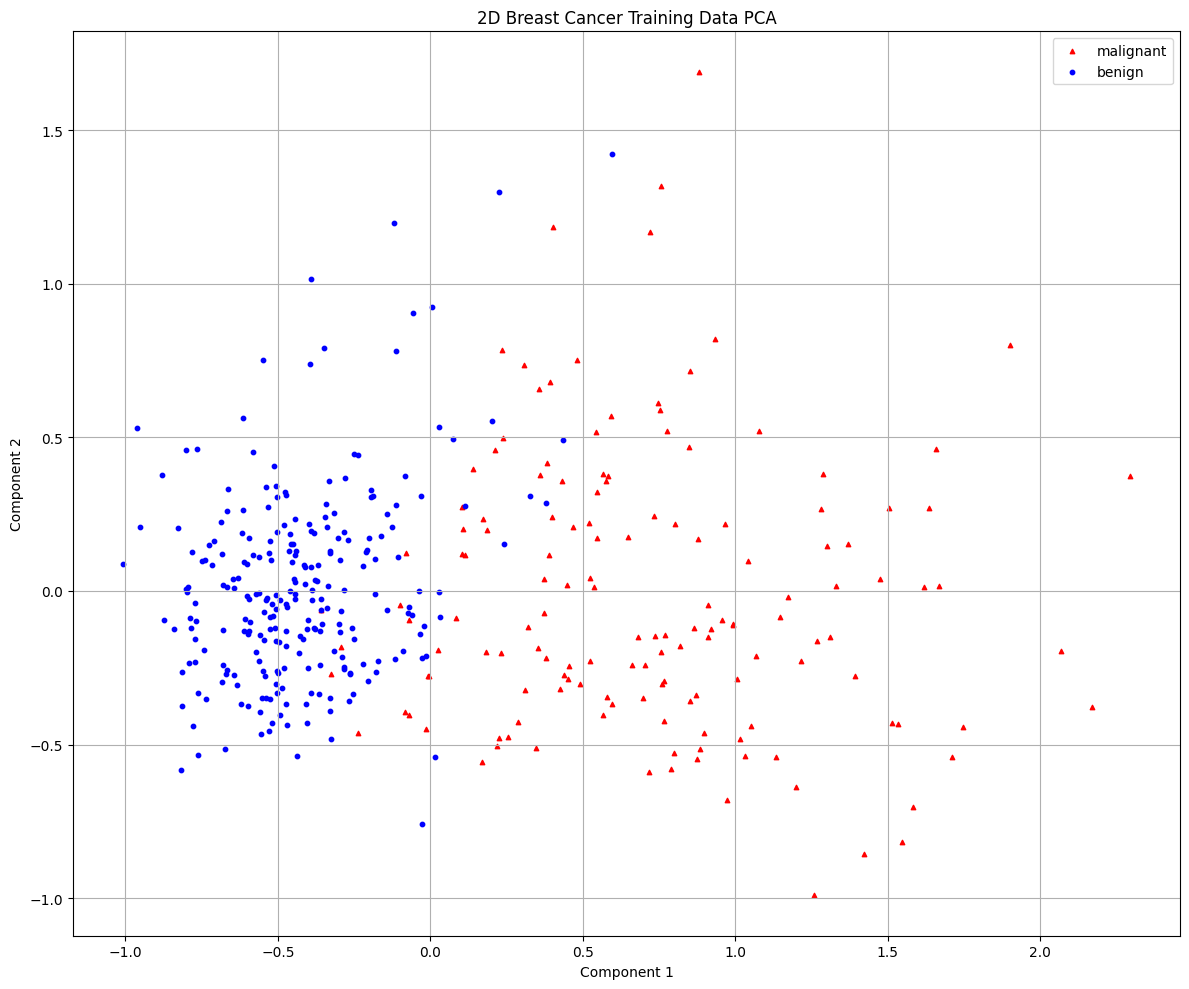

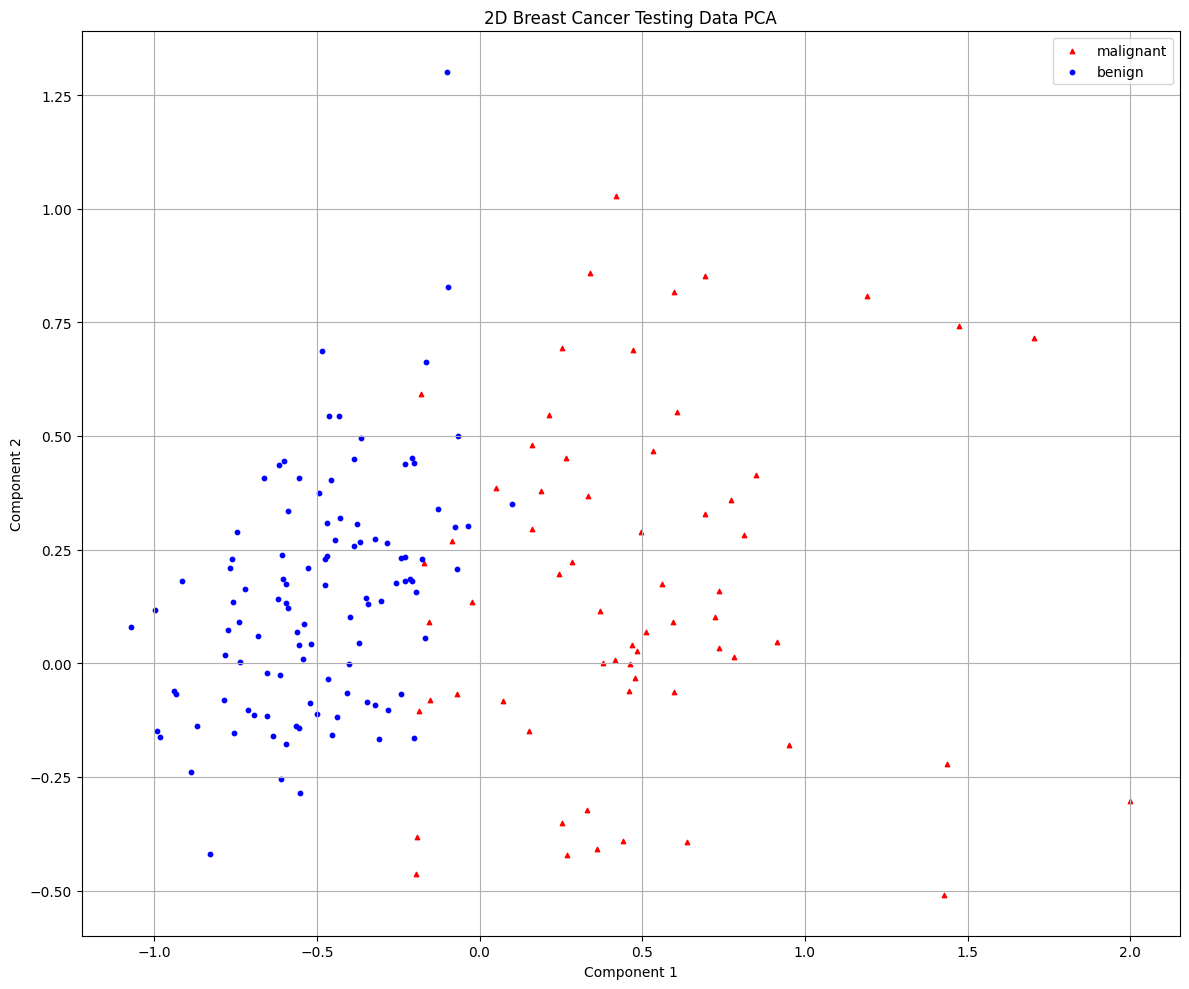

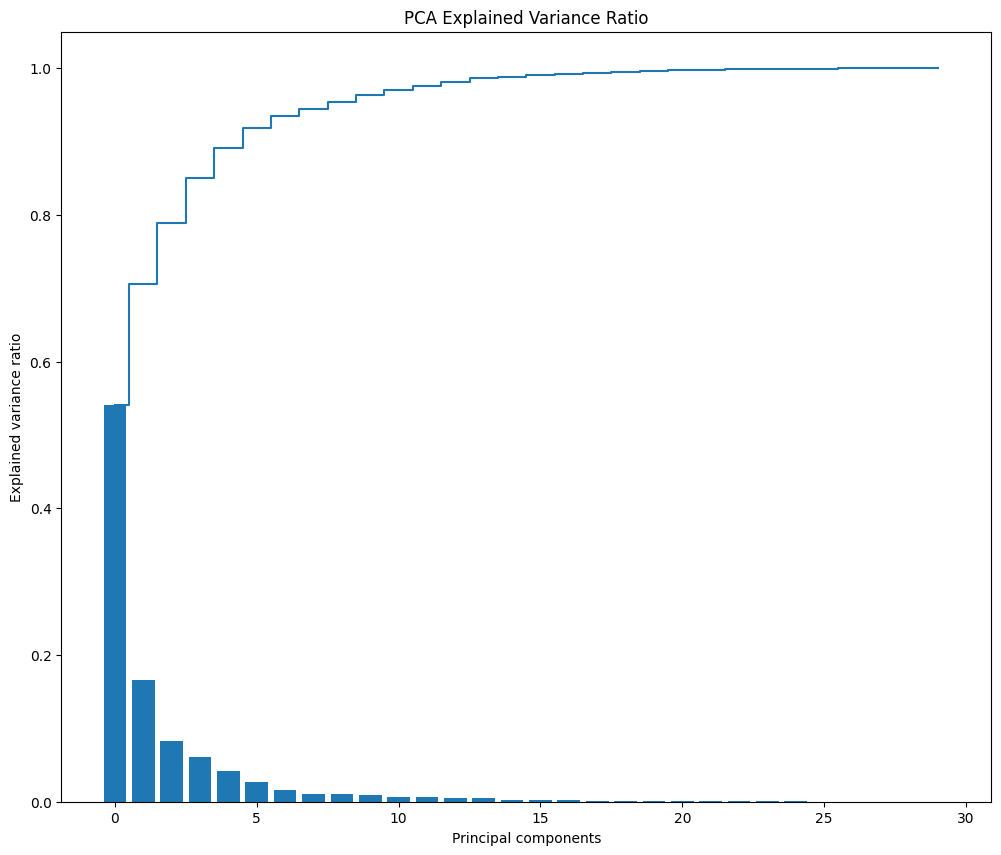

In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'pca', {})

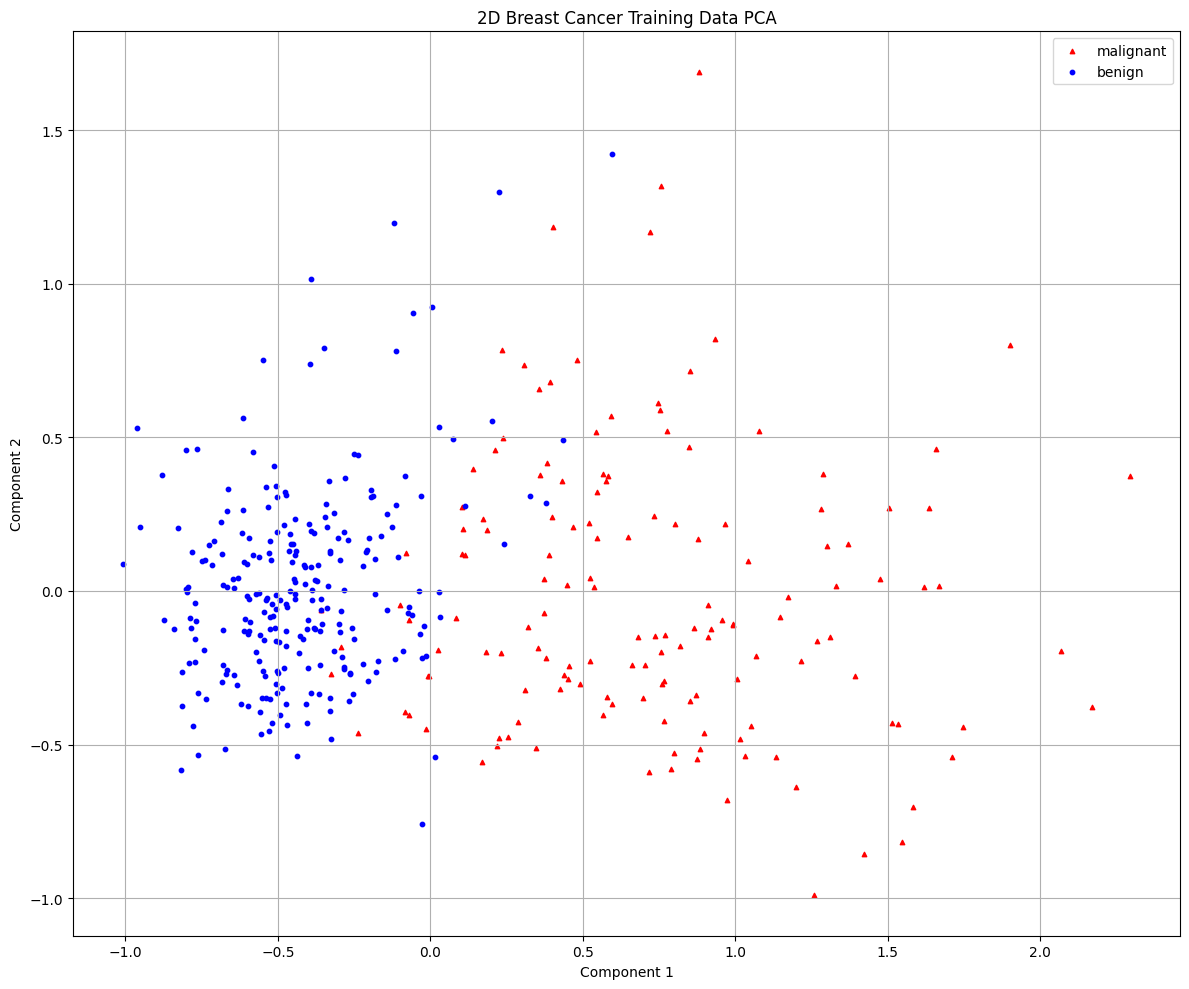

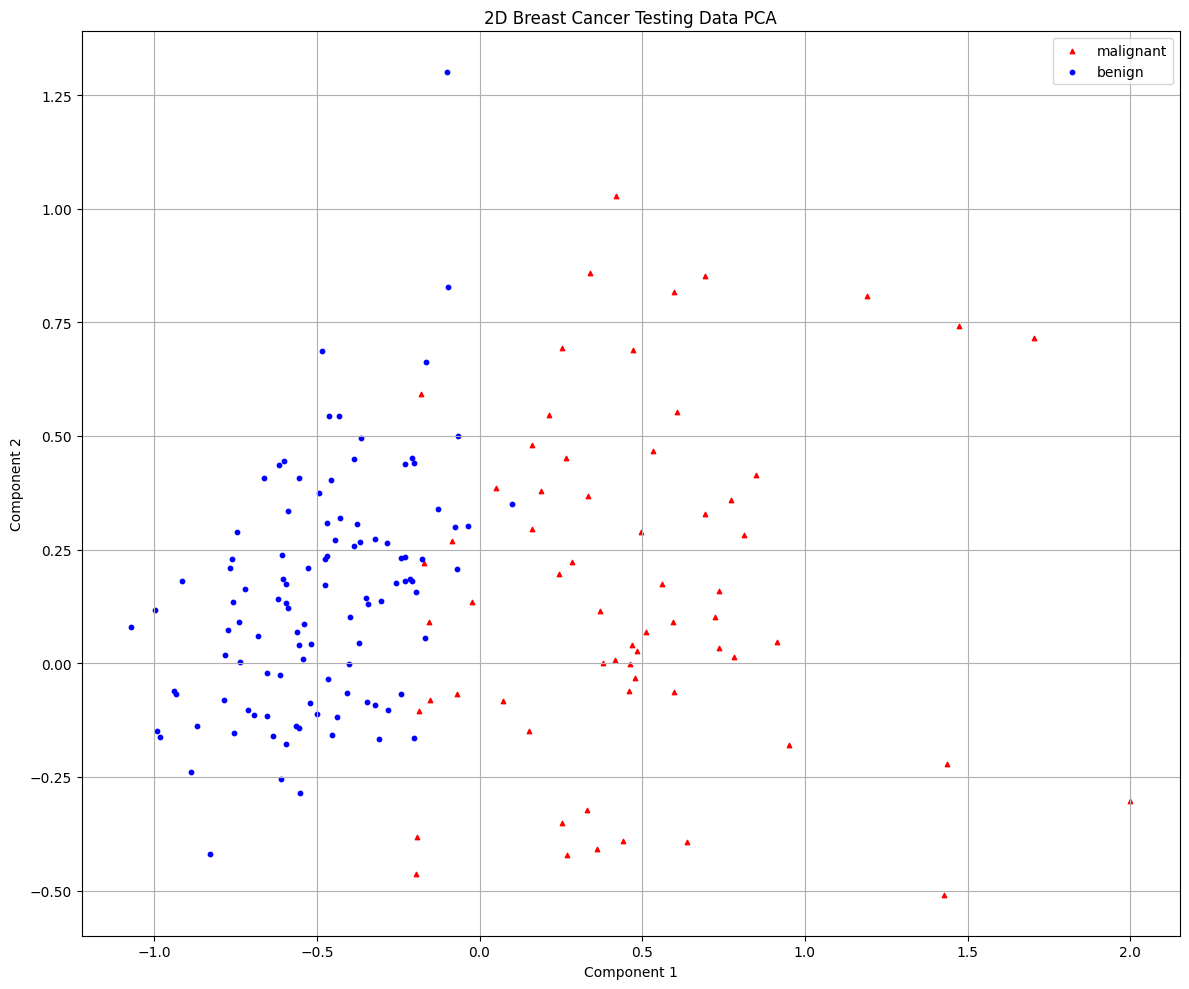

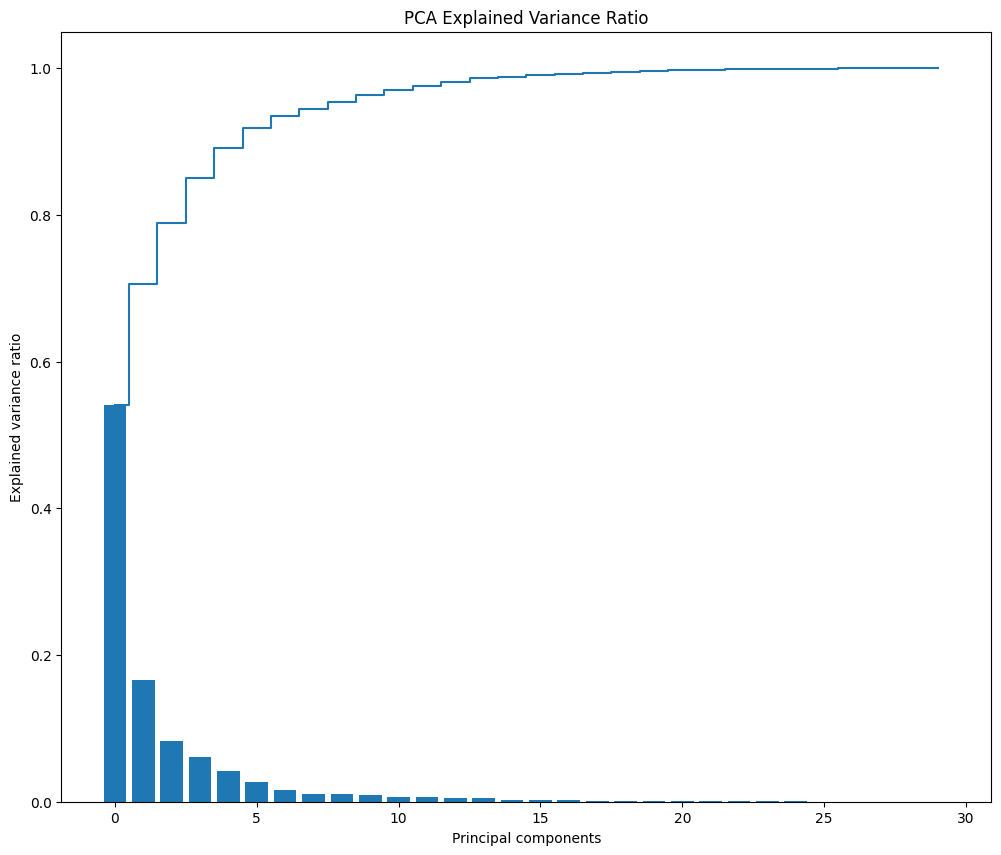

[I 2025-04-27 06:23:38,951] A new study created in memory with name: no-name-91b27395-213a-40eb-a8a7-917399803591
[I 2025-04-27 06:26:47,111] Trial 0 finished with value: 0.942246835443038 and parameters: {'n_estimators': 7825, 'learning_rate': 0.02211432187378969, 'num_leaves': 21, 'max_depth': 11, 'min_child_samples': 61, 'subsample': 0.9472143861647733, 'colsample_bytree': 0.9749829812664619, 'reg_alpha': 0.001016766109745668, 'reg_lambda': 0.011455128953379218}. Best is trial 0 with value: 0.942246835443038.
[I 2025-04-27 06:28:35,520] Trial 1 finished with value: 0.9472784810126582 and parameters: {'n_estimators': 4046, 'learning_rate': 0.09674541319974488, 'num_leaves': 99, 'max_depth': 3, 'min_child_samples': 79, 'subsample': 0.8578138361394649, 'colsample_bytree': 0.6390376724910343, 'reg_alpha': 0.0005020902696789353, 'reg_lambda': 0.15742495127470144}. Best is trial 1 with value: 0.9472784810126582.
[I 2025-04-27 06:30:52,531] Trial 2 finished with value: 0.9446835443037976 a

Best trial:
Accuracy: 0.9648417721518987
Best hyperparameters:  {'n_estimators': 4760, 'learning_rate': 0.029278058091001348, 'num_leaves': 13, 'max_depth': 8, 'min_child_samples': 28, 'subsample': 0.657112721147516, 'colsample_bytree': 0.9957405725496443, 'reg_alpha': 8.00672960121268e-06, 'reg_lambda': 0.012854076050827582}


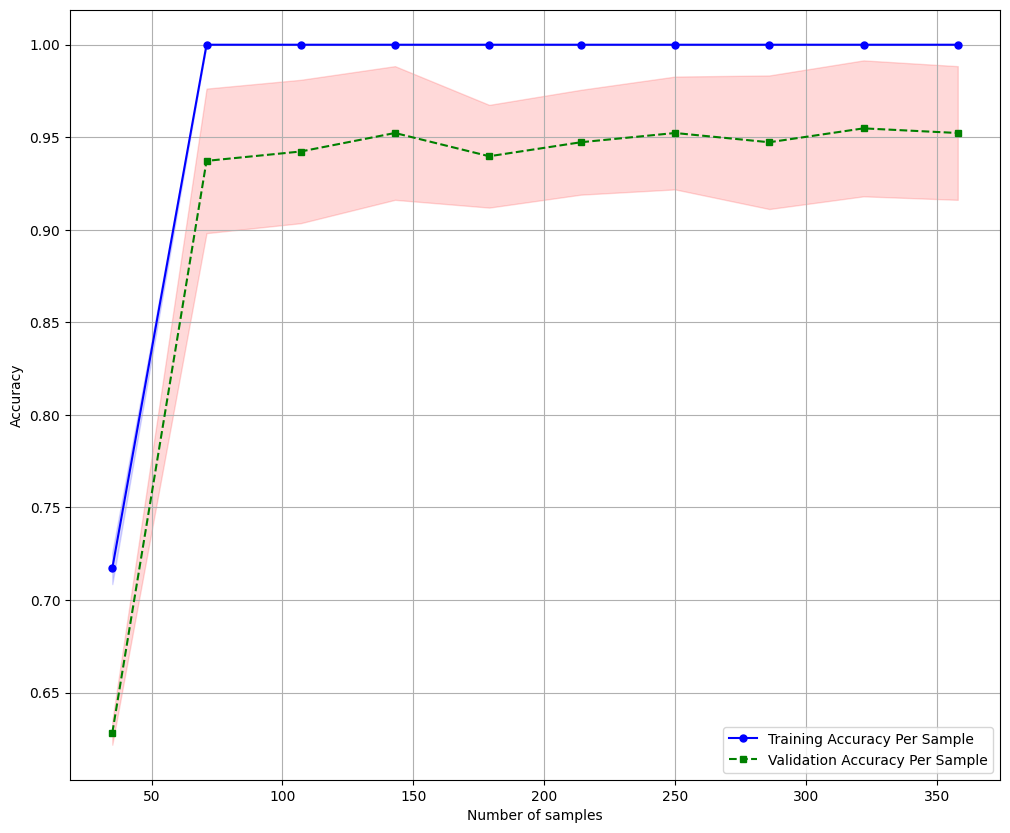

Confusion Matrix
[[ 54  10]
 [  0 107]]
Accuracy: 0.9415, Precision: 0.9145, Recall: 1.0000, F1: 0.9554, AUC: 0.9873


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'pca', {})
helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, y_train, y_test)